<a href="https://colab.research.google.com/github/SebastianOsorio20/FDS-2022-2-CC52/blob/main/TF_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("bike_buyers.csv", index_col = 0)

In [ ]:
df.head()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
ID,,,,,,,,,,,,
12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 12496 to 12121
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Marital Status    993 non-null    object 
 1   Gender            989 non-null    object 
 2   Income            994 non-null    float64
 3   Children          992 non-null    float64
 4   Education         1000 non-null   object 
 5   Occupation        1000 non-null   object 
 6   Home Owner        996 non-null    object 
 7   Cars              991 non-null    float64
 8   Commute Distance  1000 non-null   object 
 9   Region            1000 non-null   object 
 10  Age               992 non-null    float64
 11  Purchased Bike    1000 non-null   object 
dtypes: float64(4), object(8)
memory usage: 101.6+ KB


In [ ]:
df.groupby("Gender").count()

,Marital Status,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
Gender,,,,,,,,,,,
Female,487,487,484,489,489,486,485,489,489,488,489
Male,495,496,498,500,500,499,495,500,500,494,500


In [ ]:
df.groupby("Marital Status").count()

,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
Marital Status,,,,,,,,,,,
Married,529,532,534,535,535,534,532,535,535,531,535
Single,453,456,451,458,458,455,452,458,458,455,458


In [ ]:
df.groupby("Home Owner").count()

,Marital Status,Gender,Income,Children,Education,Occupation,Cars,Commute Distance,Region,Age,Purchased Bike
Home Owner,,,,,,,,,,,
No,311,309,312,311,314,314,312,314,314,312,314
Yes,678,676,678,677,682,682,675,682,682,676,682


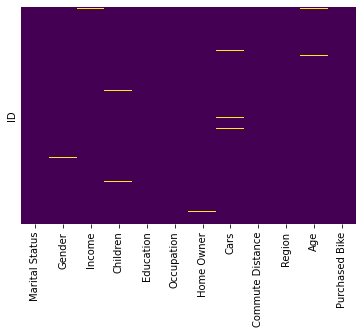

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#Usamos la mediana para reemplazar los valores NaN
#remplazando los valores NaN de Income
df['Income']=df['Income'].fillna(round(df['Income'].mean(),1))
#remplazando los valores NaN de Cars
df['Cars']=df['Cars'].fillna(round(df['Cars'].mean()))
#remplazando los valores NaN de Age
df['Age']=df['Age'].fillna(round(df['Age'].mean()))
#remplazando los valores NaN de Childrem
df['Children']=df['Children'].fillna(round(df['Children'].mean()))
#remplazando los valores NaN de Gender
df['Gender']=df['Gender'].fillna('Male')
#remplazando los valores NaN de Marital Status
df['Marital Status']=df['Marital Status'].fillna('Married')
#remplazando los valores NaN de Home Owner
df['Home Owner']=df['Home Owner'].fillna('Yes')

In [ ]:
df.isna().sum()

Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [ ]:
df.dtypes

Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object

In [ ]:
def make_int_values(df):
  df_out = pd.DataFrame()
  for c_type, column in zip(df.dtypes, df.columns):
    if c_type == "object":
      values = list(pd.Series(df[column], name='A').unique())
      dict_values = dict()
      k = 0
      for j in values:
        dict_values[j] = k
        k += 1
      df_out["A_" + column] = [dict_values[entry] for entry in df[column]]
      print(dict_values)
    else:
      df_out["A_" + column] = [entry for entry in df[column]]
  df_out.index = df.index
  return df_out

In [ ]:
df2 = make_int_values(df)

{'Married': 0, 'Single': 1}
{'Female': 0, 'Male': 1}
{'Bachelors': 0, 'Partial College': 1, 'High School': 2, 'Partial High School': 3, 'Graduate Degree': 4}
{'Skilled Manual': 0, 'Clerical': 1, 'Professional': 2, 'Manual': 3, 'Management': 4}
{'Yes': 0, 'No': 1}
{'0-1 Miles': 0, '2-5 Miles': 1, '5-10 Miles': 2, '1-2 Miles': 3, '10+ Miles': 4}
{'Europe': 0, 'Pacific': 1, 'North America': 2}
{'No': 0, 'Yes': 1}


In [ ]:
df2.head()

,A_Marital Status,A_Gender,A_Income,A_Children,A_Education,A_Occupation,A_Home Owner,A_Cars,A_Commute Distance,A_Region,A_Age,A_Purchased Bike
ID,,,,,,,,,,,,
12496,0,0,40000.0,1.0,0,0,0,0.0,0,0,42.0,0
24107,0,1,30000.0,3.0,1,1,0,1.0,0,0,43.0,0
14177,0,1,80000.0,5.0,1,2,1,2.0,1,0,60.0,0
24381,1,1,70000.0,0.0,0,2,0,1.0,2,1,41.0,1
25597,1,1,30000.0,0.0,0,1,1,0.0,0,0,36.0,1


In [ ]:
df2.to_csv('data_A.csv', index = True, encoding='utf-8')

In [ ]:
df.to_csv('data_bike_buyers_limpio.csv', index = True, encoding='utf-8')

In [ ]:
df2.isna().sum()

A_Marital Status      0
A_Gender              0
A_Income              0
A_Children            0
A_Education           0
A_Occupation          0
A_Home Owner          0
A_Cars                0
A_Commute Distance    0
A_Region              0
A_Age                 0
A_Purchased Bike      0
dtype: int64

In [ ]:
df["Income"].describe()

count      1000.000000
mean      56267.605600
std       30974.380206
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

In [ ]:
def income_range(x):
  if x <= 30000:
    return "0k~30k"
  elif x <= 60000:
    return "30k~60k"
  elif x <= 90000:
    return "60k~90k"
  else: return "90k+"

In [ ]:
df["Range_Income"] = [income_range(entry) for entry in df["Income"]]
df['Range_Income'] = pd.Categorical(df['Range_Income'], ["0k~30k","30k~60k","60k~90k","90k+"])

In [ ]:
df.head()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Range_Income
ID,,,,,,,,,,,,,
12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No,30k~60k
24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No,0k~30k
14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No,60k~90k
24381,Single,Male,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes,60k~90k
25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes,0k~30k


1. ¿En qué rango de ingreso se encuentra la mayor proporción de compradores?

[Text(0.5, 1.0, 'Número de personas según sus ingresos')]

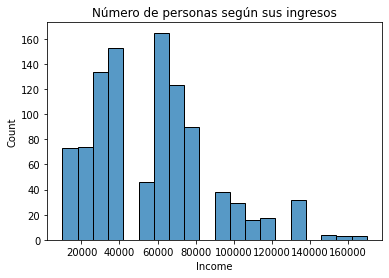

In [ ]:
sns.histplot(data=df, x="Income").set(title='Número de personas según sus ingresos')

[Text(0.5, 1.0, 'Número de personas según su rango de ingresos')]

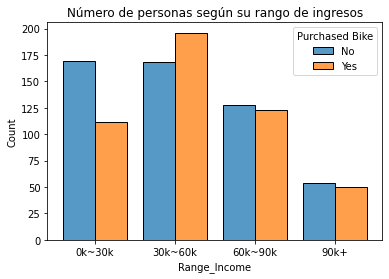

In [ ]:
sns.histplot(data=df, x="Range_Income", hue="Purchased Bike", multiple="dodge", shrink=.8).set(title='Número de personas según su rango de ingresos')

[Text(0.5, 1.0, 'Number of customers by Income')]

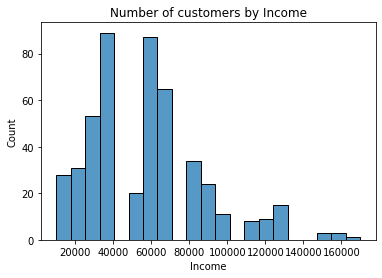

In [ ]:
data_purchased = df[df["Purchased Bike"] == "Yes"]
sns.histplot(data=data_purchased, x="Income").set(title='Number of customers by Income')

In [ ]:
data_purchased.groupby("Range_Income").count()["Purchased Bike"]

Range_Income
0k~30k     112
30k~60k    196
60k~90k    123
90k+        50
Name: Purchased Bike, dtype: int64

In [ ]:
df.groupby("Range_Income").count()["Purchased Bike"]

Range_Income
0k~30k     281
30k~60k    364
60k~90k    251
90k+       104
Name: Purchased Bike, dtype: int64

In [ ]:
rates = data_purchased.groupby("Range_Income").count()["Purchased Bike"]/df.groupby("Range_Income").count()["Purchased Bike"]
rates

Range_Income
0k~30k     0.398577
30k~60k    0.538462
60k~90k    0.490040
90k+       0.480769
Name: Purchased Bike, dtype: float64

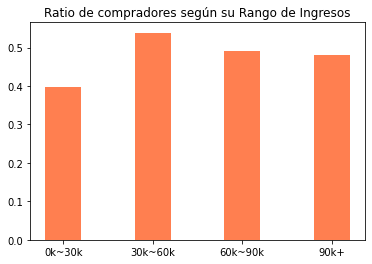

In [ ]:
plt.bar(rates.index, rates.values, color ='coral', width = 0.4)
plt.title("Ratio de compradores según su Rango de Ingresos")
plt.show()

2. ¿Quiénes compran bicicletas a nivel de rango de ingresos y género?

[Text(0.5, 1.0, 'Número de compradores según Rango de Ingresos y Género')]

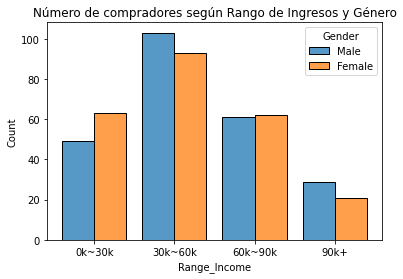

In [ ]:
sns.histplot(data=data_purchased, x="Range_Income", hue="Gender", multiple="dodge", shrink=.8).set(title='Número de compradores según Rango de Ingresos y Género')

3. ¿Quiénes compran bicicletas a nivel de rango de ingresos y estado civil?

[Text(0.5, 1.0, 'Número de compradores según Rango de Ingresos y Estado Civil')]

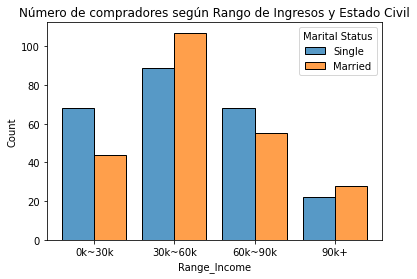

In [ ]:
sns.histplot(data=data_purchased, x="Range_Income", hue="Marital Status", multiple="dodge", shrink=.8).set(title='Número de compradores según Rango de Ingresos y Estado Civil')

Pregunta 4

In [ ]:
data_purchased.drop(columns=['Purchased Bike'])

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Range_Income
ID,,,,,,,,,,,,
24381,Single,Male,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,60k~90k
25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,0k~30k
27974,Single,Male,160000.0,2.0,High School,Management,Yes,4.0,0-1 Miles,Pacific,33.0,90k+
19364,Married,Male,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,43.0,30k~60k
19280,Married,Male,56267.6,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,44.0,30k~60k
...,...,...,...,...,...,...,...,...,...,...,...,...
11292,Single,Male,150000.0,1.0,Partial College,Professional,No,3.0,0-1 Miles,North America,44.0,90k+
23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,30k~60k
28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,60k~90k


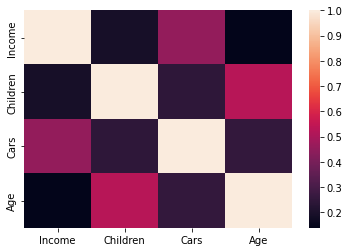

In [ ]:
sns.heatmap(df[df['Purchased Bike']=='Yes'].corr())

5. ¿Qué regiones presentan el mayor número de compras “Yes” y “No”?

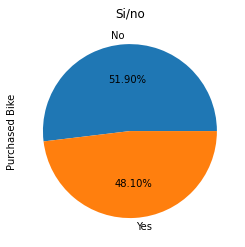

In [ ]:
df['Purchased Bike'].value_counts().plot(kind='pie', autopct='%.2f%%',title='Si/no')

In [ ]:
lugar = df.groupby(['Region','Purchased Bike']).size()

lugar

Region         Purchased Bike
Europe         No                152
               Yes               148
North America  No                288
               Yes               220
Pacific        No                 79
               Yes               113
dtype: int64

In [ ]:
lugar = lugar.reset_index()
lugar

,Region,Purchased Bike,0
0,Europe,No,152
1,Europe,Yes,148
2,North America,No,288
3,North America,Yes,220
4,Pacific,No,79
5,Pacific,Yes,113


In [ ]:
lugar = pd.pivot_table(lugar,columns='Region',index='Purchased Bike',values=0)
lugar

Region,Europe,North America,Pacific
Purchased Bike,,,
No,152,288,79
Yes,148,220,113


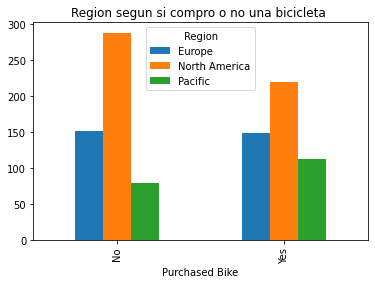

In [ ]:
lugar.plot(kind='bar',title='Region segun si compro o no una bicicleta ')

6. Analizar las variables Gender, Occupation y Children

- Occupation / Gender

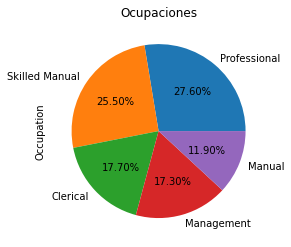

In [ ]:
df['Occupation'].value_counts().plot(kind='pie', autopct='%.2f%%',title='Ocupaciones')

In [ ]:
df_g = df.groupby(['Gender','Occupation']).size()

df_g

Gender  Occupation    
Female  Clerical           95
        Management         78
        Manual             68
        Professional      126
        Skilled Manual    122
Male    Clerical           82
        Management         95
        Manual             51
        Professional      150
        Skilled Manual    133
dtype: int64

In [ ]:
df_g = df_g.reset_index()
df_g

,Gender,Occupation,0
0,Female,Clerical,95
1,Female,Management,78
2,Female,Manual,68
3,Female,Professional,126
4,Female,Skilled Manual,122
5,Male,Clerical,82
6,Male,Management,95
7,Male,Manual,51
8,Male,Professional,150
9,Male,Skilled Manual,133


In [ ]:
df_g = pd.pivot_table(df_g,columns='Gender',index='Occupation',values=0)
df_g

Gender,Female,Male
Occupation,,
Clerical,95,82
Management,78,95
Manual,68,51
Professional,126,150
Skilled Manual,122,133


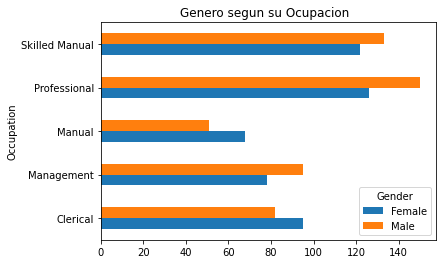

In [ ]:
df_g.plot(kind='barh',title='Genero segun su Ocupacion  ')

- Occupation / Children

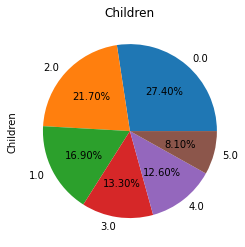

In [ ]:
df['Children'].value_counts().plot(kind='pie', autopct='%.2f%%',title='Children')

In [ ]:
df_children = df.groupby(['Occupation','Children']).size()

df_children

Occupation      Children
Clerical        0.0         60
                1.0         39
                2.0         45
                3.0         29
                4.0          3
                5.0          1
Management      0.0         20
                1.0         22
                2.0         38
                3.0         27
                4.0         41
                5.0         25
Manual          0.0         52
                1.0         16
                2.0         35
                3.0          8
                4.0          6
                5.0          2
Professional    0.0         60
                1.0         30
                2.0         55
                3.0         45
                4.0         47
                5.0         39
Skilled Manual  0.0         82
                1.0         62
                2.0         44
                3.0         24
                4.0         29
                5.0         14
dtype: int64

In [ ]:
df_children = df_children.reset_index()
df_children

,Occupation,Children,0
0,Clerical,0.0,60
1,Clerical,1.0,39
2,Clerical,2.0,45
3,Clerical,3.0,29
4,Clerical,4.0,3
5,Clerical,5.0,1
6,Management,0.0,20
7,Management,1.0,22
8,Management,2.0,38
9,Management,3.0,27


In [ ]:
df_children = pd.pivot_table(df_children,columns='Children',index='Occupation',values=0)
df_children

Children,0.0,1.0,2.0,3.0,4.0,5.0
Occupation,,,,,,
Clerical,60,39,45,29,3,1
Management,20,22,38,27,41,25
Manual,52,16,35,8,6,2
Professional,60,30,55,45,47,39
Skilled Manual,82,62,44,24,29,14


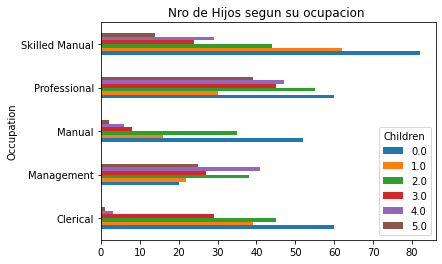

In [ ]:
df_children.plot(kind='barh',title='Nro de Hijos segun su ocupacion ')

- Children / Gender

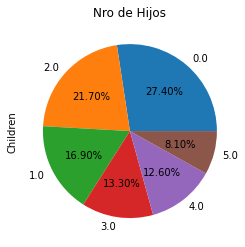

In [ ]:
df['Children'].value_counts().plot(kind='pie', autopct='%.2f%%',title='Nro de Hijos')

In [ ]:
df_genero = df.groupby(['Gender','Children']).size()

df_genero

Gender  Children
Female  0.0         133
        1.0          82
        2.0          99
        3.0          75
        4.0          63
        5.0          37
Male    0.0         141
        1.0          87
        2.0         118
        3.0          58
        4.0          63
        5.0          44
dtype: int64

In [ ]:
df_genero = df_genero.reset_index()
df_genero

,Gender,Children,0
0,Female,0.0,133
1,Female,1.0,82
2,Female,2.0,99
3,Female,3.0,75
4,Female,4.0,63
5,Female,5.0,37
6,Male,0.0,141
7,Male,1.0,87
8,Male,2.0,118
9,Male,3.0,58


In [ ]:
df_genero = pd.pivot_table(df_genero,columns='Gender',index='Children',values=0)
df_genero

Gender,Female,Male
Children,,
0.0,133,141
1.0,82,87
2.0,99,118
3.0,75,58
4.0,63,63
5.0,37,44


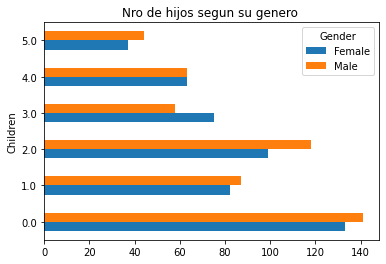

In [ ]:
df_genero.plot(kind='barh',title='Nro de hijos segun su genero ')

Pregunta 7

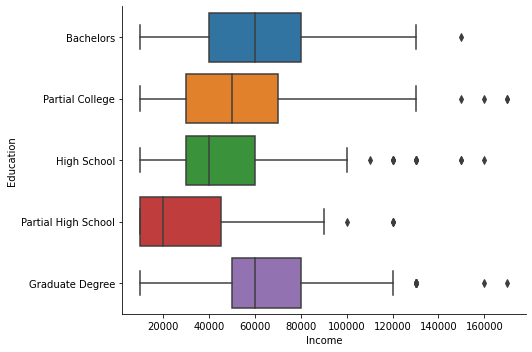

In [ ]:
sns.catplot(data=df,x='Income',y='Education',kind='box', aspect=1.5)

#Preguntas 8 

[Text(0.5, 1.0, 'Distribución de la cantidad de autos, según la ocupación')]

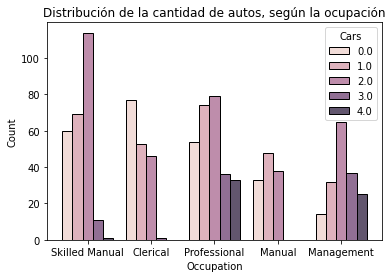

In [ ]:
#Pregunta 8
#Analizar las varibles Occupation y Cars
sns.histplot(data=df, x="Occupation", hue="Cars", multiple="dodge", shrink=.8).set(title = 'Distribución de la cantidad de autos, según la ocupación')

[Text(0.5, 1.0, 'Distribución de catidad de personas según ocupación')]

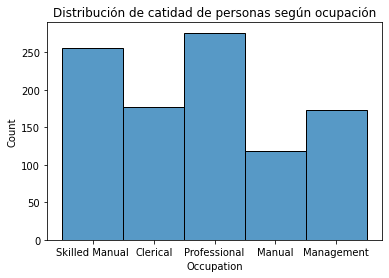

In [ ]:
sns.histplot(data=df, x="Occupation").set(title = 'Distribución de catidad de personas según ocupación')

[Text(0.5, 1.0, 'Distribución de compra de bicicletas según la profesión')]

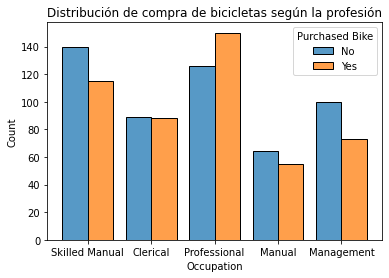

In [ ]:
sns.histplot(data=df, x="Occupation", hue="Purchased Bike", multiple="dodge", shrink=.8).set(title = 'Distribución de compra de bicicletas según la profesión')

[Text(0.5, 1.0, 'Distribución de autos según su cantidad')]

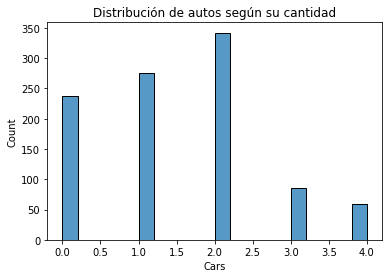

In [ ]:
sns.histplot(data=df, x="Cars").set(title = 'Distribución de autos según su cantidad')

[Text(0.5, 1.0, 'Distribución de compra de bicicletas según la cantidad de autos en posesión')]

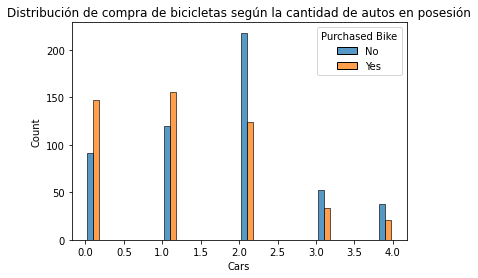

In [ ]:
sns.histplot(data=df, x="Cars", hue="Purchased Bike", multiple="dodge", shrink=.8).set(title = 'Distribución de compra de bicicletas según la cantidad de autos en posesión')

#Pregunta 9

[Text(0.5, 1.0, 'Distribución de dueños de casa según cantidad de niños')]

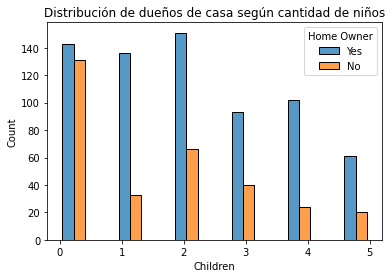

In [ ]:
sns.histplot(data=df, x="Children", hue="Home Owner", multiple="dodge", shrink=.8).set(title = 'Distribución de dueños de casa según cantidad de niños')

[Text(0.5, 1.0, 'Distribución de dueños de casa según cantidad de autos adquiridos')]

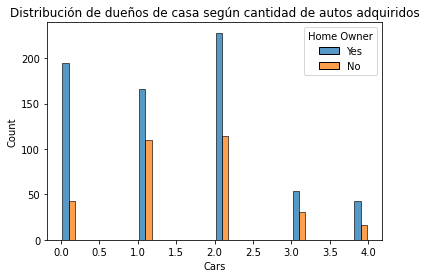

In [ ]:
sns.histplot(data=df, x="Cars", hue="Home Owner", multiple="dodge", shrink=.8).set(title = 'Distribución de dueños de casa según cantidad de autos adquiridos')

Marital Status  Gender  Income  Children  \
Home Owner Purchased Bike                                             
No         No                         159     159     159       159   
           Yes                        155     155     155       155   
Yes        No                         360     360     360       360   
           Yes                        326     326     326       326   

                           Education  Occupation  Cars  Commute Distance  \
Home Owner Purchased Bike                                                  
No         No                    159         159   159               159   
           Yes                   155         155   155               155   
Yes        No                    360         360   360               360   
           Yes                   326         326   326               326   

                           Region  Age  Range_Income  
Home Owner Purchased Bike                             
No         No                 159  159           159  
           Yes                155  155           155  
Yes        No                 360  360           360  
           Yes                326  326           326

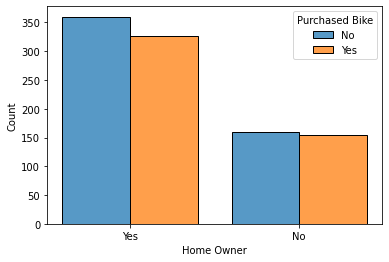

In [ ]:
sns.histplot(data=df, x="Home Owner", hue="Purchased Bike", multiple="dodge", shrink=.8)
df.groupby(["Home Owner", "Purchased Bike"]).count()

#Pregunta 10

Text(0.5, 1.0, 'Cantidad de compradores por distancia de viaje,\nsegún el estado de propiedad de una casa')

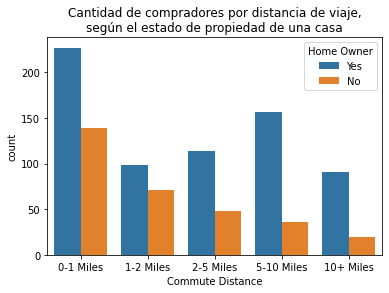

In [ ]:
sns.countplot(data=df,x='Commute Distance', hue='Home Owner', order=['0-1 Miles','1-2 Miles','2-5 Miles','5-10 Miles','10+ Miles'])
plt.title('Cantidad de compradores por distancia de viaje,\nsegún el estado de propiedad de una casa')